GASER ZAGHLOUL

libraries 

In [890]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix


read data

In [891]:
df=pd.read_csv("first inten project.csv")

In [892]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


check data types 

In [893]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

check any missing values 

In [894]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

check any dupicates

In [895]:
df.duplicated().sum()

0

name numerical and categorical columns 

In [896]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests'],
      dtype='object')

In [897]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Booking_ID', 'type of meal', 'room type', 'market segment type',
       'date of reservation', 'booking status'],
      dtype='object')

show the most number of child and adult repeated in the data 

In [898]:
print(df["number of adults"].value_counts())
print(df["number of children"].value_counts())


number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64
number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


same thing in the nights 

In [899]:
print(df["number of weekend nights"].value_counts())
print(df["number of week nights"].value_counts())

number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64


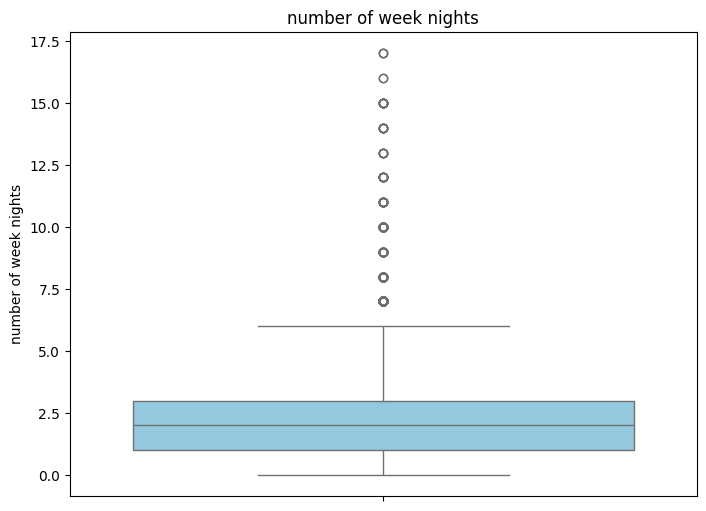

In [900]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3,1)
sns.boxplot(y=df["number of week nights"], color='skyblue')
plt.title(f'number of week nights')
plt.tight_layout()
plt.show()

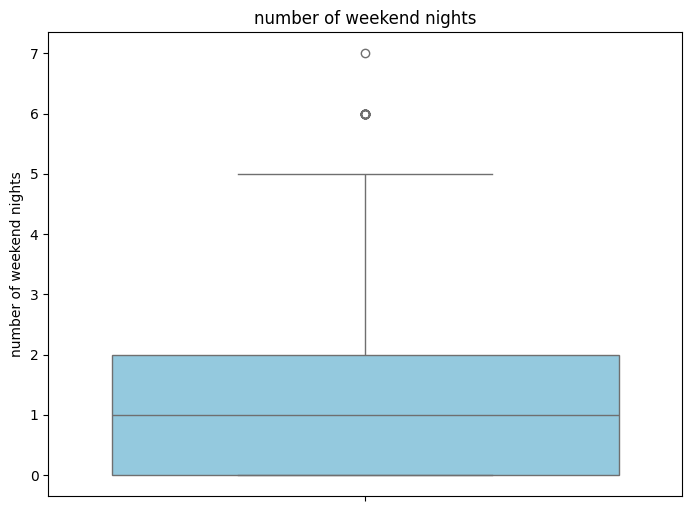

In [901]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3,1)
sns.boxplot(y=df["number of weekend nights"], color='skyblue')
plt.title(f'number of weekend nights')
plt.tight_layout()
plt.show()

show the max and min number of adult we have

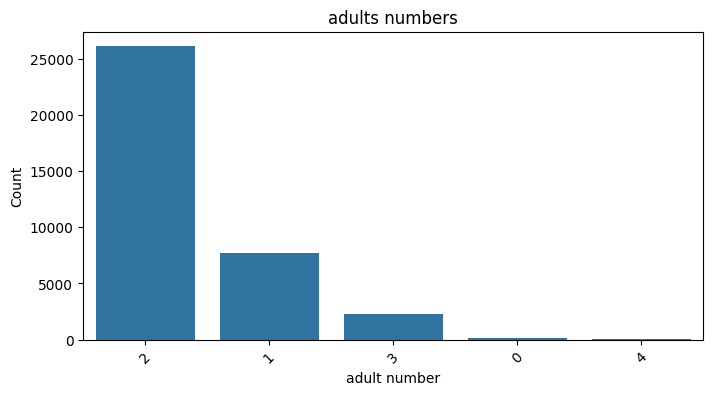

In [902]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="number of adults", order=df["number of adults"].value_counts().index)
plt.title("adults numbers")
plt.xlabel("adult number")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [903]:
df["number of adults"].mean()

1.844839465343806

show the max and min number of adult we have

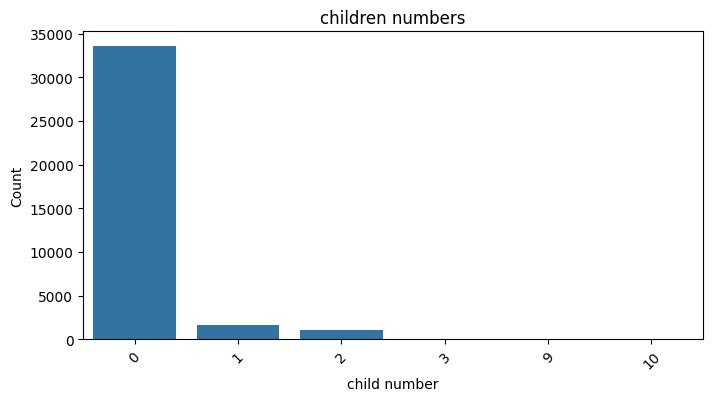

In [904]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="number of children", order=df["number of children"].value_counts().index)
plt.title("children numbers")
plt.xlabel("child number")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

which books that have the max number of children ?
which books that have the max number of adult  ?



 summary statistics of numerical columns 
 

In [905]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


 the distribution of numerical columns 

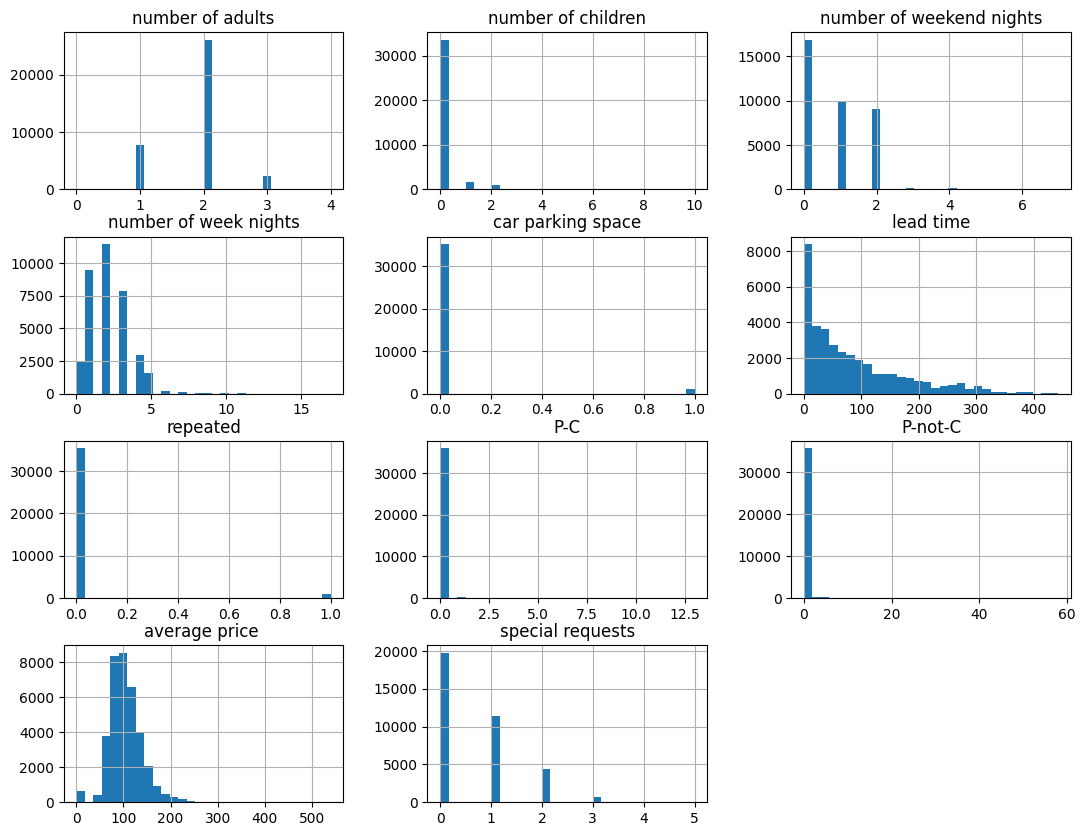

In [906]:
df.hist(figsize=(13, 10), bins=30)
plt.show()

 the correlations between numerical columns 

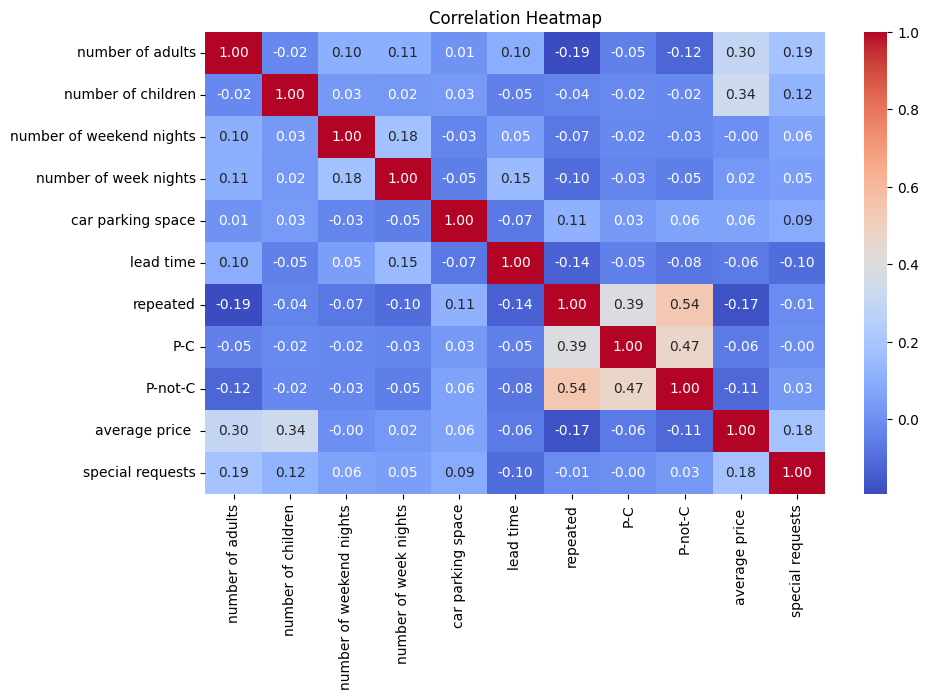

In [907]:
numerical = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


What are the most common categories ???

In [908]:
for col in df.select_dtypes(include="object").columns:
    print(f"Column: {col}")
    print(df[col].value_counts(), "\n")


Column: Booking_ID
Booking_ID
INN00001    1
INN24194    1
INN24188    1
INN24189    1
INN24190    1
           ..
INN12090    1
INN12089    1
INN12088    1
INN12087    1
INN36286    1
Name: count, Length: 36285, dtype: int64 

Column: type of meal
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64 

Column: room type
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64 

Column: market segment type
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64 

Column: date of reservation
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
             ... 
10/2/2015       1
7/24/2017       1
9/13/2016       1
5/20/2017       1
7

which days of the week have the highest reservations

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/1622057183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_r")


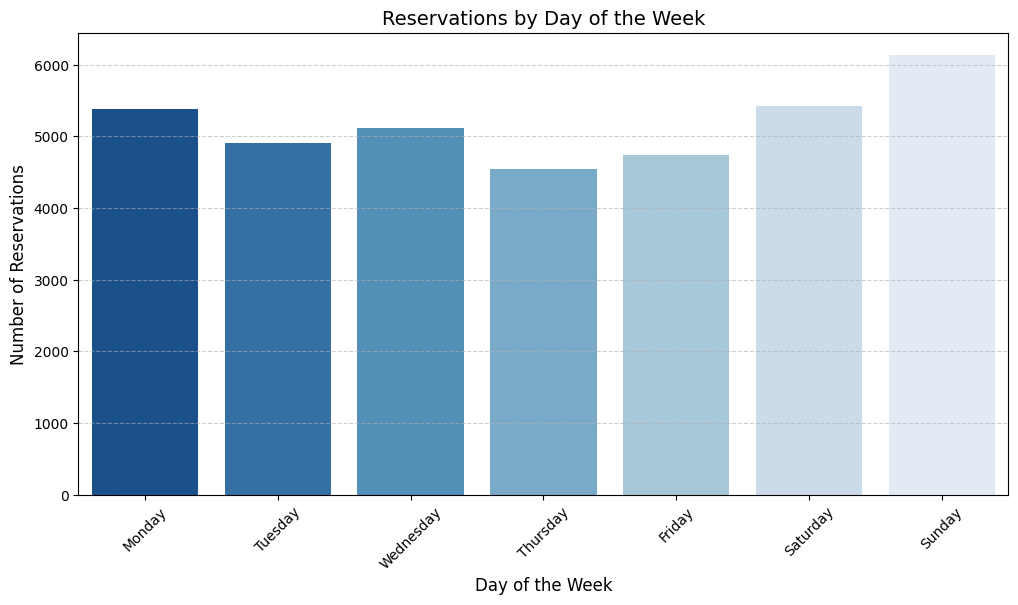

In [909]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
df['day_of_week'] = df['date of reservation'].dt.day_name()
# Coounnnnnt reservations per day
day_counts = df['day_of_week'].value_counts()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = day_counts.reindex(day_order)


plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_r")
plt.title("Reservations by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


which month have the highest reservations

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/1604048050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="Greens_r")


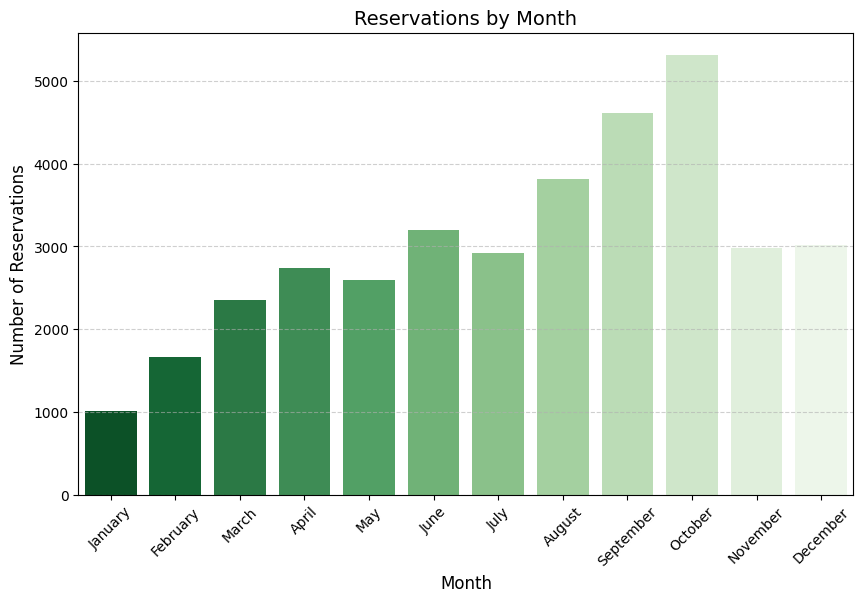

In [910]:
df['month'] = df['date of reservation'].dt.month_name()
month_counts = df['month'].value_counts()
month_order = ["January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December"]
month_counts = month_counts.reindex(month_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="Greens_r")

plt.title("Reservations by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [911]:
total_reservations = df.shape[0]
print(f"Total Reservations: {total_reservations}")


Total Reservations: 36285


the average price across room types



/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/4243647583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_price.index, y=room_price.values, palette="Blues_r")


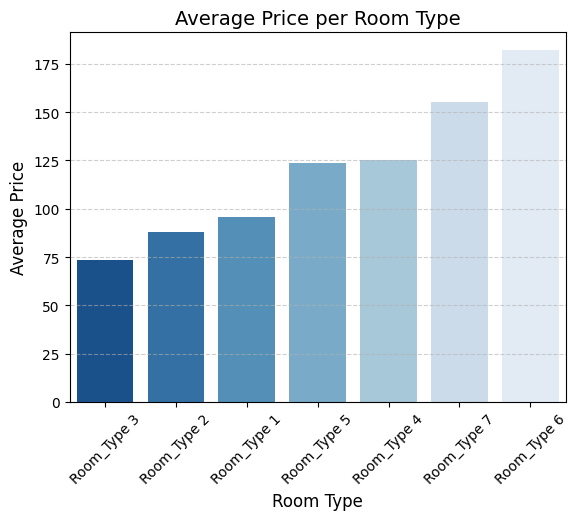

In [912]:
room_price = df.groupby("room type")["average price "].mean().sort_values()

sns.barplot(x=room_price.index, y=room_price.values, palette="Blues_r")

plt.title("Average Price per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


the average price across meal types



/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/2043072182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meal_price.index, y=meal_price.values, palette="Blues_r")


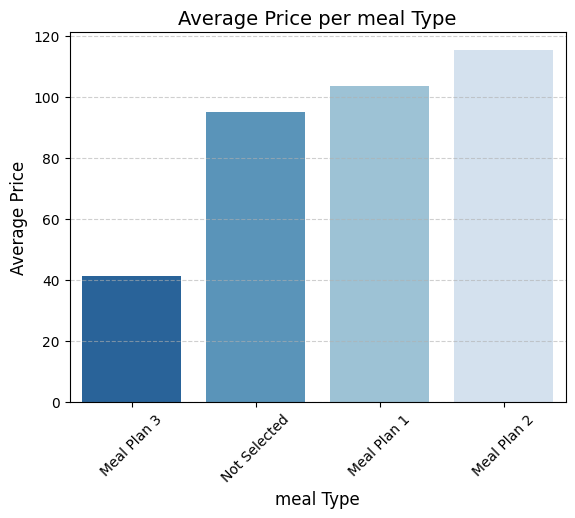

In [913]:
meal_price = df.groupby("type of meal")["average price "].mean().sort_values()

sns.barplot(x=meal_price.index, y=meal_price.values, palette="Blues_r")

plt.title("Average Price per meal Type", fontsize=14)
plt.xlabel("meal Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

how many books are canceled and its percentage

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/375544733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["booking status"], palette="coolwarm")


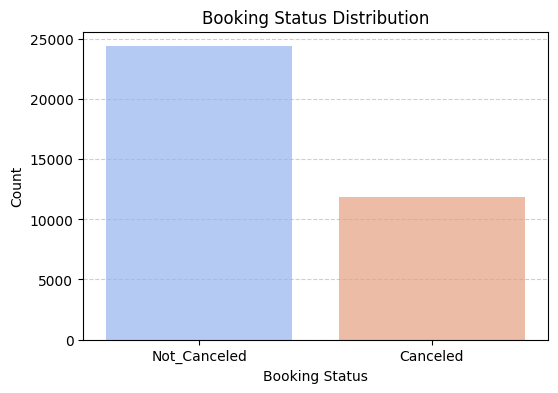

In [914]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["booking status"], palette="coolwarm")
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [915]:
cancellation_rate = (df['booking status'].value_counts(normalize=True) * 100)
print(cancellation_rate)

booking status
Not_Canceled    67.234394
Canceled        32.765606
Name: proportion, dtype: float64


 Which month had the highest cancellations?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/1175606262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Reds_r")


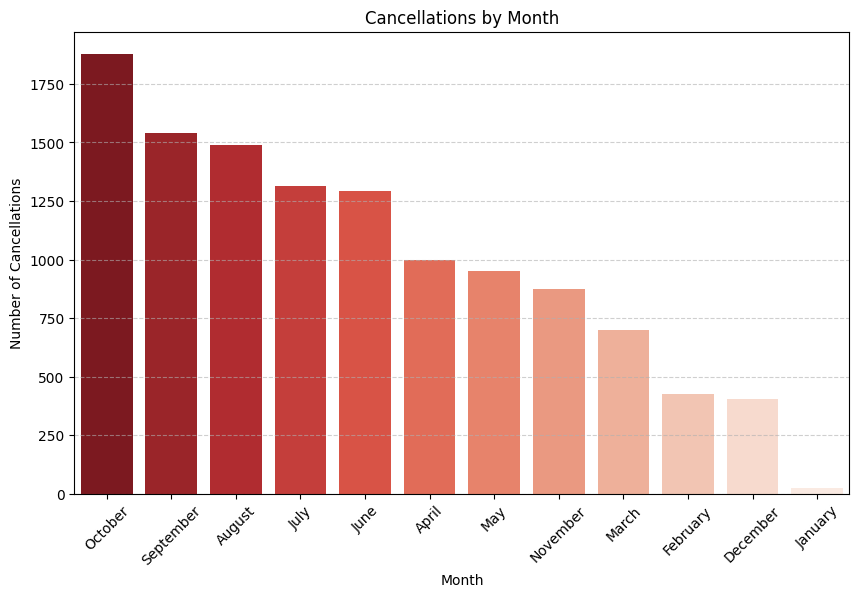

In [916]:
df['month'] = df['date of reservation'].dt.month_name()
cancellation_counts = df[df['booking status'] == 'Canceled']['month'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Reds_r")
plt.title("Cancellations by Month")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Do last-minute bookings have a higher cancellation rate?

lead time is the time between reservation and the checj-in 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/2384711344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_lead = df[df['booking status'] == 'Canceled'].groupby('lead_time_category').size()
/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/2384711344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_rate_by_lead.index, y=cancellation_rate_by_lead.values, palette="Reds_r")


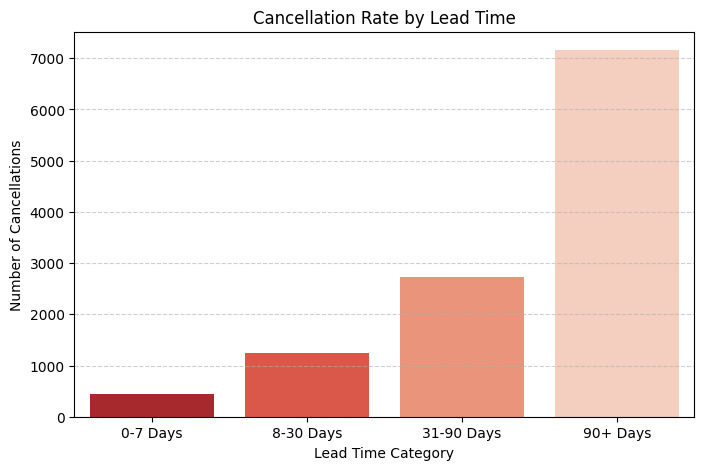

In [917]:
df['lead_time_category'] = pd.cut(df['lead time'], bins=[0, 7, 30, 90, 365], 
                                labels=['0-7 Days', '8-30 Days', '31-90 Days', '90+ Days'])
cancellation_rate_by_lead = df[df['booking status'] == 'Canceled'].groupby('lead_time_category').size()


plt.figure(figsize=(8, 5))
sns.barplot(x=cancellation_rate_by_lead.index, y=cancellation_rate_by_lead.values, palette="Reds_r")
plt.title("Cancellation Rate by Lead Time")
plt.xlabel("Lead Time Category")
plt.ylabel("Number of Cancellations")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/2214883118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_counts.index, y=room_counts.values, palette="Greens_r")


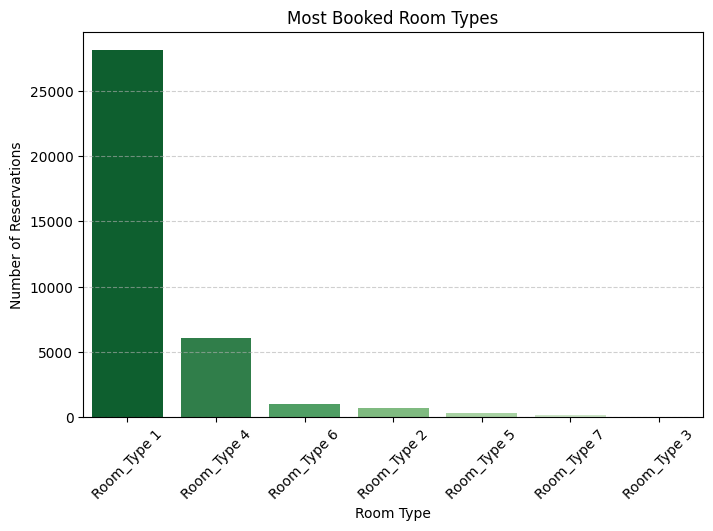

In [918]:
room_counts = df['room type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=room_counts.index, y=room_counts.values, palette="Greens_r")
plt.title("Most Booked Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Reservations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


most market segment 

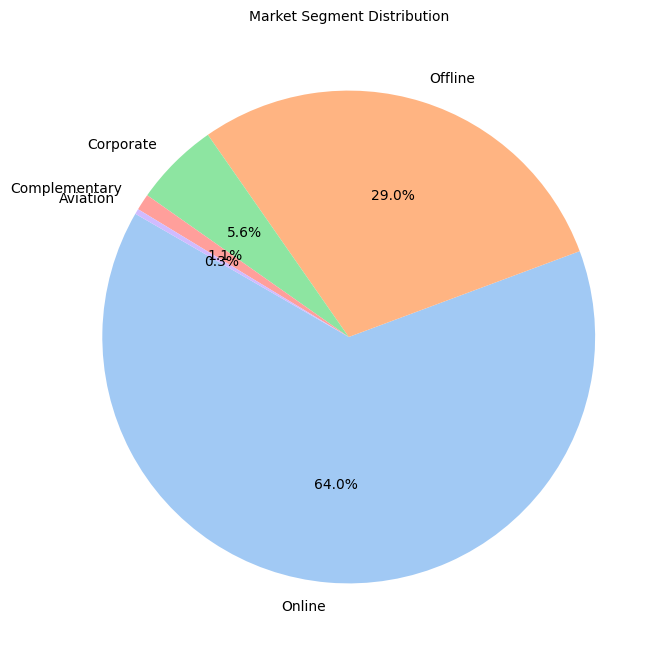

In [919]:
market_counts = df['market segment type'].value_counts()
plt.figure(figsize=(10, 8))
colors = sns.color_palette("pastel")
plt.pie(market_counts, labels=market_counts.index, autopct='%2.1f%%', colors=colors, startangle=150)

plt.title("Market Segment Distribution", fontsize=10)
plt.show()


price accourding to the market type

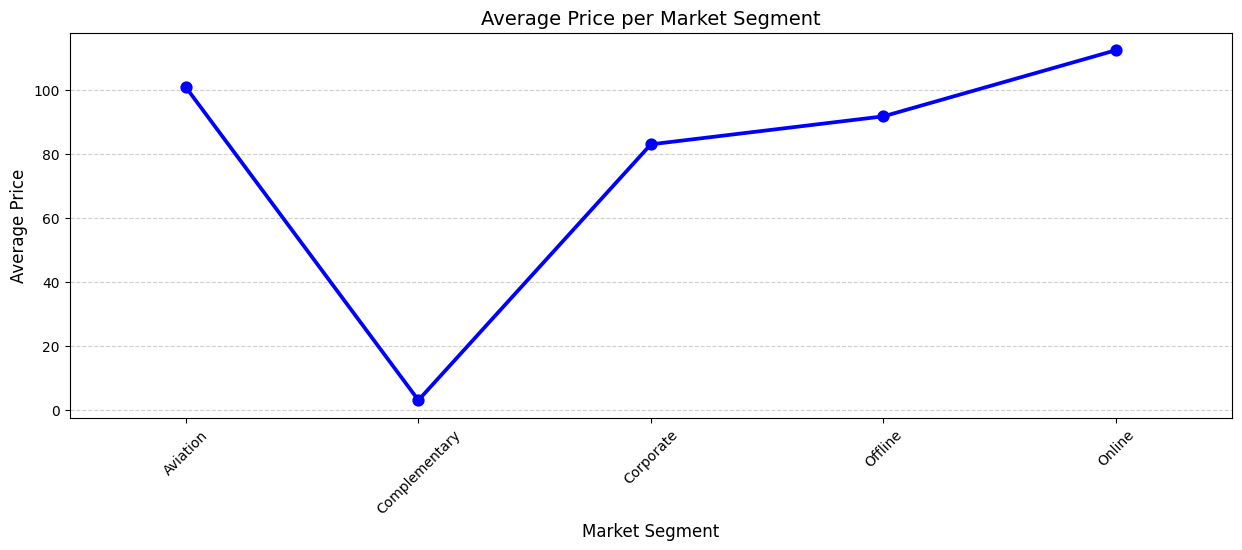

In [920]:
market_avg_price = df.groupby('market segment type')["average price "].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.pointplot(data=market_avg_price, x="market segment type", y="average price ", color="blue", marker="o", linestyles="-")
plt.title("Average Price per Market Segment", fontsize=14)
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


Do guests with children book more weekends compared to weekdays?

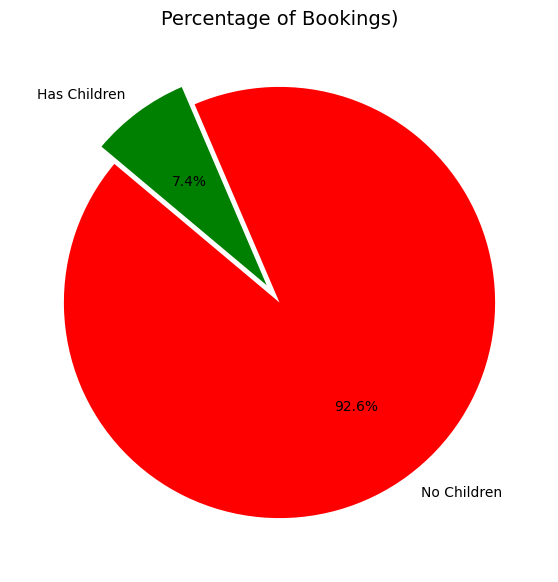

In [921]:
df['has_children'] = df['number of children'] > 0
children_counts = df['has_children'].value_counts()
labels = ["No Children", "Has Children"]


plt.figure(figsize=(7, 7))
colors = ["red", "green"] 
plt.pie(children_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0, 0.1])

plt.title("Percentage of Bookings)", fontsize=14)
plt.show()



Do special requests impact cancellations?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/1383319542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["booking status"], y=df["special requests"], palette="coolwarm")


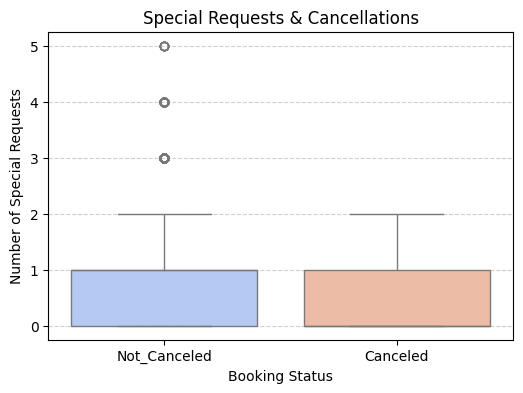

In [922]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["booking status"], y=df["special requests"], palette="coolwarm")
plt.title("Special Requests & Cancellations")
plt.xlabel("Booking Status")
plt.ylabel("Number of Special Requests")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



In [923]:
df['special requests'].value_counts()

special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

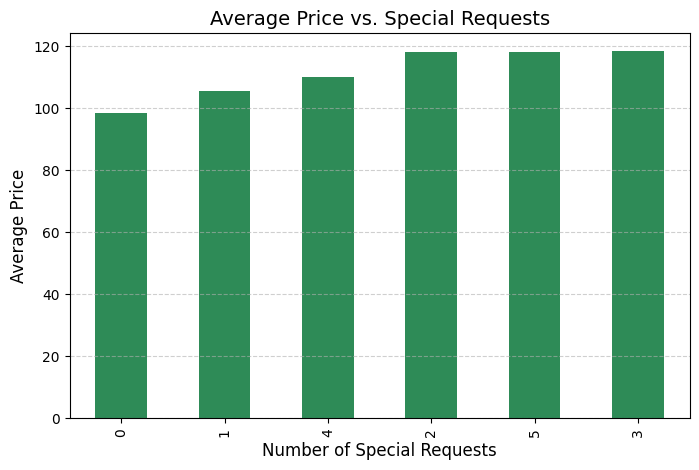

In [924]:
special_request_price = df.groupby("special requests")["average price "].mean()

plt.figure(figsize=(8, 5))
special_request_price.sort_values().plot(kind="bar", color="seagreen")

plt.title("Average Price vs. Special Requests", fontsize=14)
plt.xlabel("Number of Special Requests", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


Which room type has the highest number of special requests?

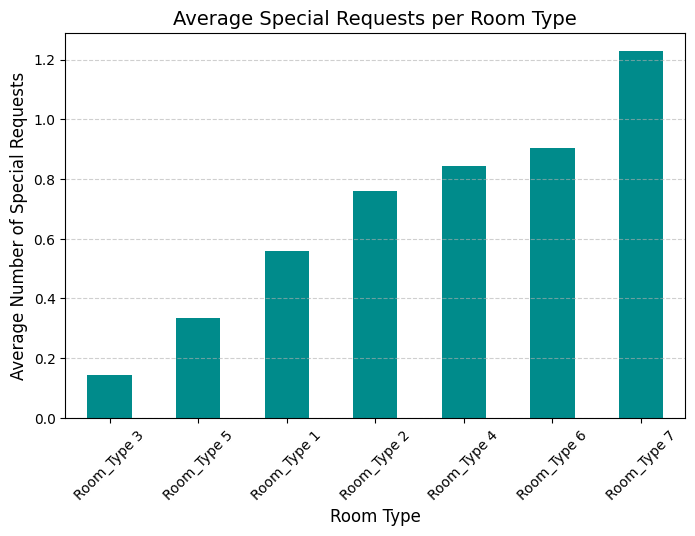

In [925]:
room_special_requests = df.groupby("room type")["special requests"].mean()

plt.figure(figsize=(8, 5))
room_special_requests.sort_values().plot(kind="bar", color="darkcyan")

plt.title("Average Special Requests per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Number of Special Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


does family or not affect on booking price ?

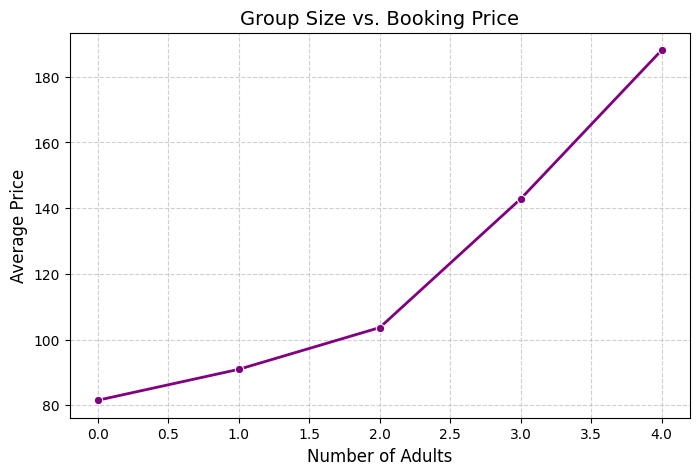

In [926]:
group_price = df.groupby("number of adults")["average price "].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=group_price, x="number of adults", y="average price ", marker="o", color="purple", linewidth=2)
plt.title("Group Size vs. Booking Price", fontsize=14)
plt.xlabel("Number of Adults", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()



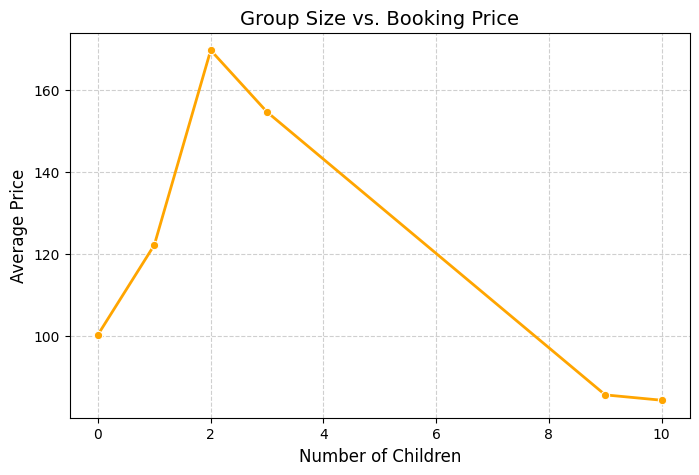

In [927]:
group_price = df.groupby("number of children")["average price "].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=group_price, x="number of children", y="average price ", marker="o", color="orange", linewidth=2)
plt.title("Group Size vs. Booking Price", fontsize=14)
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

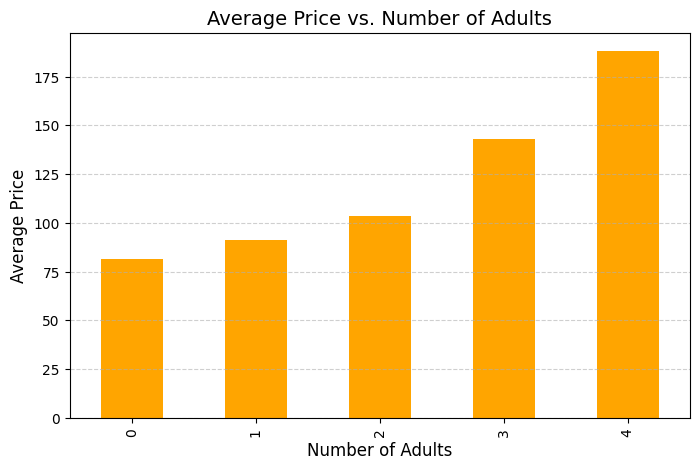

In [928]:
adults_price = df.groupby("number of adults")["average price "].mean()

plt.figure(figsize=(8, 5))
adults_price.sort_index().plot(kind="bar", color="orange")

plt.title("Average Price vs. Number of Adults", fontsize=14)
plt.xlabel("Number of Adults", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


 Does Car Parking Availability Affect Cancellation Probability?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/353118854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parking_cancellation.index, y=parking_cancellation.values, palette="BuPu")


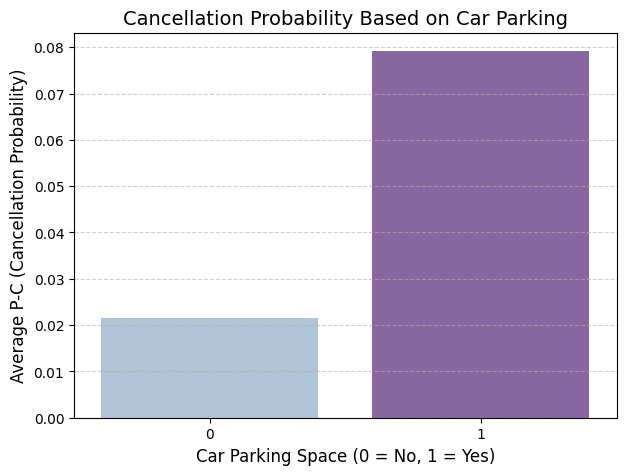

In [929]:
parking_cancellation = df.groupby("car parking space")["P-C"].mean()

plt.figure(figsize=(7, 5))
sns.barplot(x=parking_cancellation.index, y=parking_cancellation.values, palette="BuPu")

plt.title("Cancellation Probability Based on Car Parking", fontsize=14)
plt.xlabel("Car Parking Space (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Average P-C (Cancellation Probability)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

 Do expensive Bookings have higher cancellations?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/2844208104.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_cancellation = df.groupby("price_category")["P-C"].mean().reset_index()


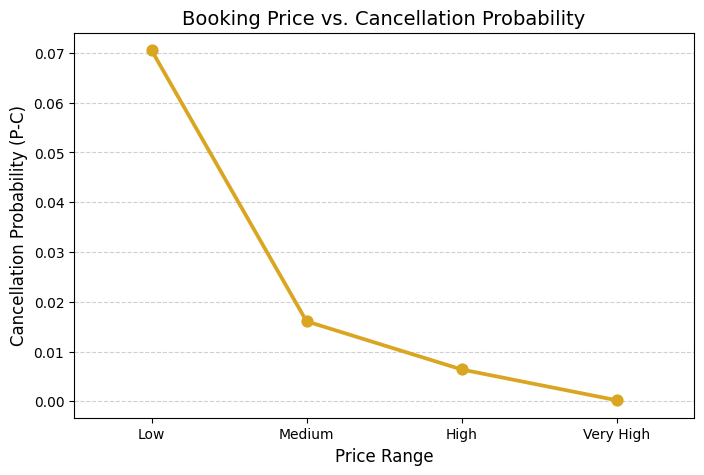

In [930]:
df["price_category"] = pd.qcut(df["average price "], 4, labels=["Low", "Medium", "High", "Very High"])
price_cancellation = df.groupby("price_category")["P-C"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.pointplot(data=price_cancellation, x="price_category", y="P-C", color="goldenrod", marker="o", linestyles="-")
plt.title("Booking Price vs. Cancellation Probability", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Cancellation Probability (P-C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


Does having Children impact cancellation probability?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_34958/3023588210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=children_cancellation.index, y=children_cancellation.values, palette="coolwarm")


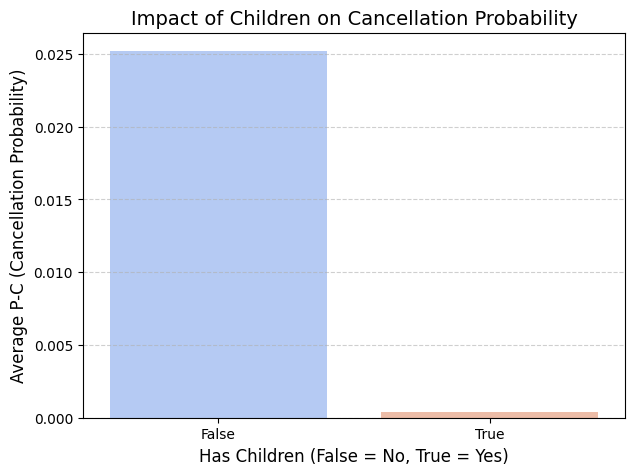

In [931]:
children_cancellation = df.groupby(df["number of children"] > 0)["P-C"].mean()

plt.figure(figsize=(7, 5))
sns.barplot(x=children_cancellation.index, y=children_cancellation.values, palette="coolwarm")

plt.title("Impact of Children on Cancellation Probability", fontsize=14)
plt.xlabel("Has Children (False = No, True = Yes)", fontsize=12)
plt.ylabel("Average P-C (Cancellation Probability)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


 Do cancellations depend on the Number of Weekend Nights?

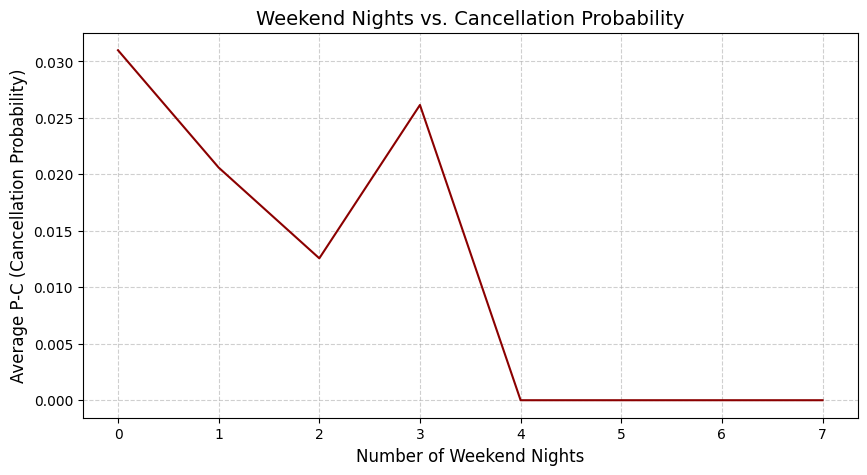

In [932]:
weekend_cancellation = df.groupby("number of weekend nights")["P-C"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekend_cancellation.index, y=weekend_cancellation.values, color="darkred")
plt.title("Weekend Nights vs. Cancellation Probability", fontsize=14)
plt.xlabel("Number of Weekend Nights", fontsize=12)
plt.ylabel("Average P-C (Cancellation Probability)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [933]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,P-not-C,average price,special requests,date of reservation,booking status,day_of_week,month,lead_time_category,has_children,price_category
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,88.00,0,2015-10-02,Not_Canceled,Friday,October,90+ Days,True,Medium
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,106.68,1,2018-11-06,Not_Canceled,Tuesday,November,0-7 Days,False,High
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,50.00,0,2018-02-28,Canceled,Wednesday,February,0-7 Days,True,Low
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,100.00,1,2017-05-20,Canceled,Saturday,May,90+ Days,False,High
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,77.00,0,2018-04-11,Canceled,Wednesday,April,31-90 Days,False,Low


In [934]:
df.drop(['Booking_ID','day_of_week', 'month','lead_time_category','has_children','price_category'], axis='columns', inplace=True)

In [935]:
df['date_of_reservation'] = pd.to_datetime(df['date of reservation'])

# Then extract useful features
df['reservation_year'] = df['date_of_reservation'].dt.year
df['reservation_month'] = df['date_of_reservation'].dt.month
df['reservation_day'] = df['date_of_reservation'].dt.day
df['reservation_dayofweek'] = df['date_of_reservation'].dt.dayofweek

In [936]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,...,P-not-C,average price,special requests,date of reservation,booking status,date_of_reservation,reservation_year,reservation_month,reservation_day,reservation_dayofweek
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,...,0,88.00,0,2015-10-02,Not_Canceled,2015-10-02,2015.0,10.0,2.0,4.0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,...,0,106.68,1,2018-11-06,Not_Canceled,2018-11-06,2018.0,11.0,6.0,1.0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,...,0,50.00,0,2018-02-28,Canceled,2018-02-28,2018.0,2.0,28.0,2.0
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,...,0,100.00,1,2017-05-20,Canceled,2017-05-20,2017.0,5.0,20.0,5.0
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,...,0,77.00,0,2018-04-11,Canceled,2018-04-11,2018.0,4.0,11.0,2.0


In [937]:
df['date_of_reservation'] = pd.to_datetime(df['date of reservation'])

# Then extract useful features
df['reservation_year'] = df['date_of_reservation'].dt.year
df['reservation_month'] = df['date_of_reservation'].dt.month
df['reservation_day'] = df['date_of_reservation'].dt.day
df['reservation_dayofweek'] = df['date_of_reservation'].dt.dayofweek
df.drop('date_of_reservation', axis="columns", inplace=True)

In [938]:
df.head()


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,reservation_year,reservation_month,reservation_day,reservation_dayofweek
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,2015.0,10.0,2.0,4.0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,2018.0,11.0,6.0,1.0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,2018.0,2.0,28.0,2.0
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,2017.0,5.0,20.0,5.0
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,2018.0,4.0,11.0,2.0


In [939]:
categorical_cols = ['type of meal', 'room type', 'market segment type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88.00,...,False,False,False,False,False,False,False,False,True,False
1,1,0,1,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,2,1,1,3,0,1,0,0,0,50.00,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,1,0,1,2,0,48,0,0,0,77.00,...,False,False,False,False,False,False,False,False,False,True


In [940]:
le = LabelEncoder()
df_encoded['booking status'] = le.fit_transform(df_encoded['booking status'])

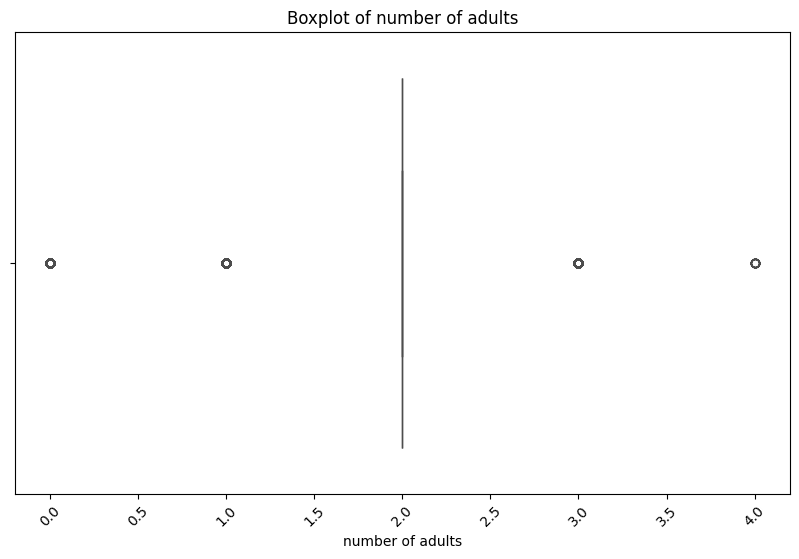

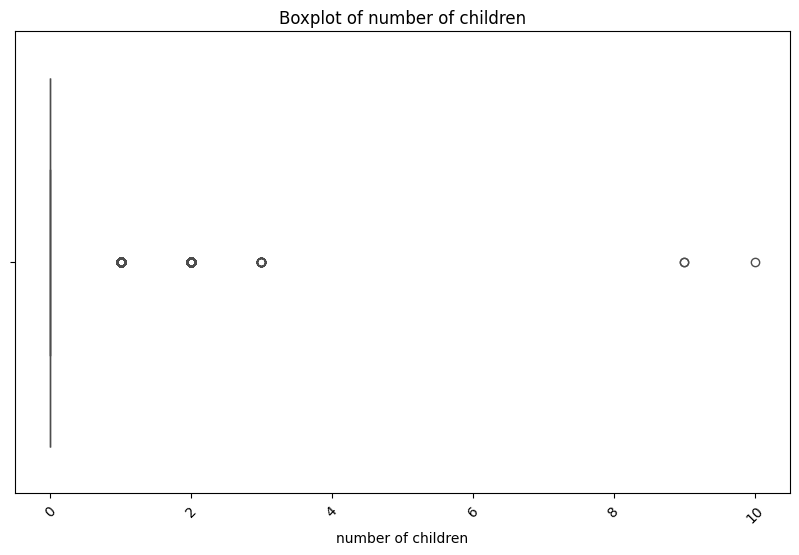

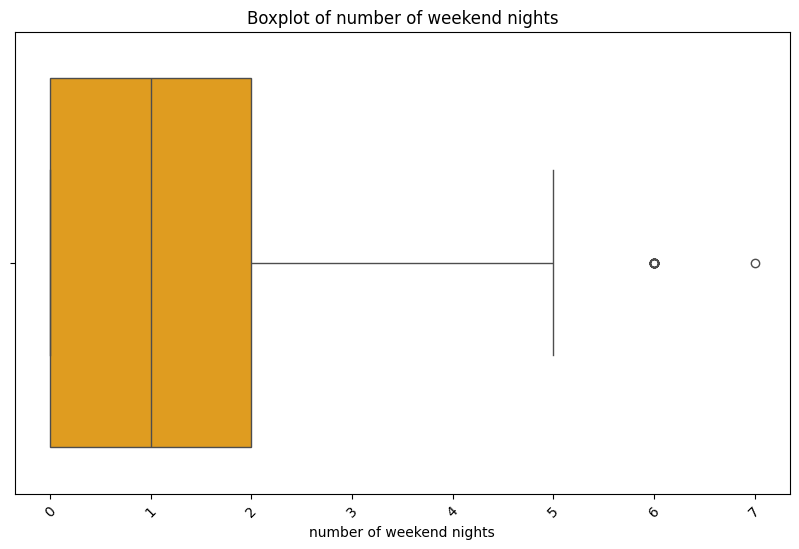

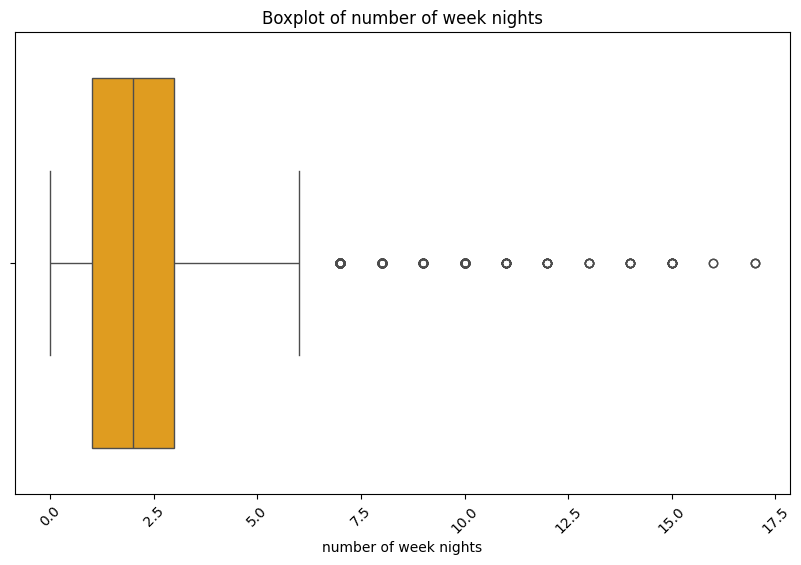

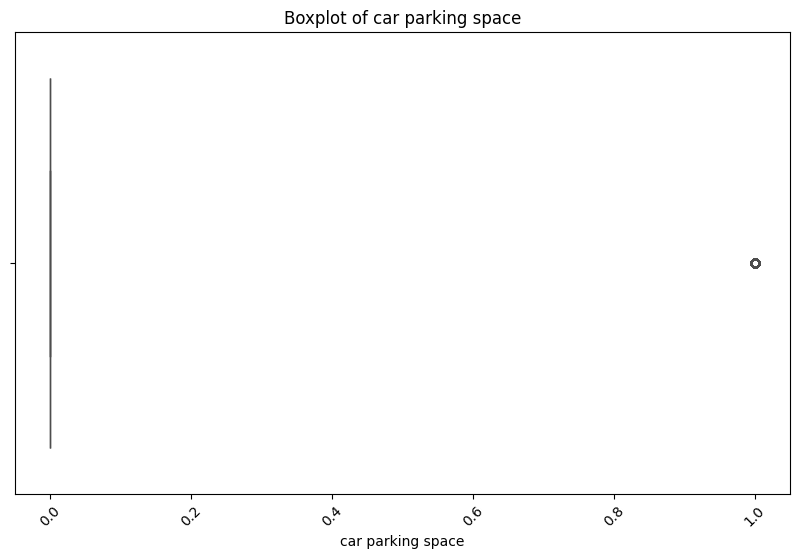

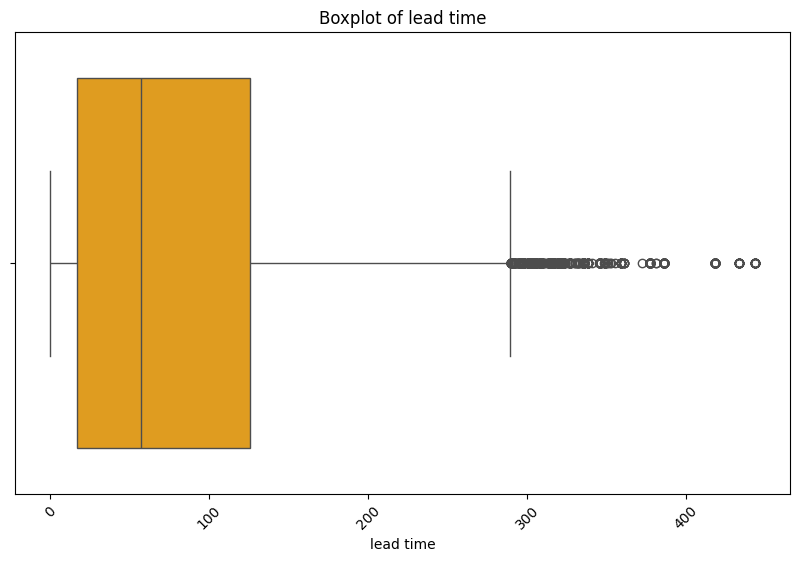

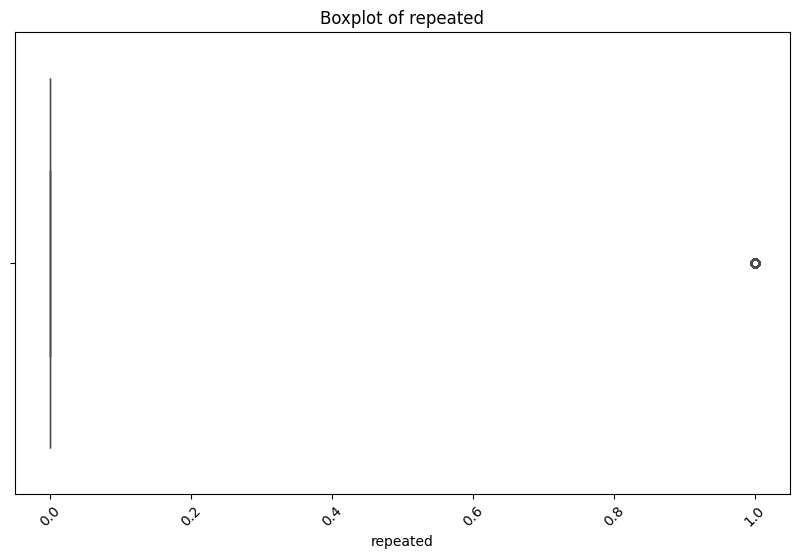

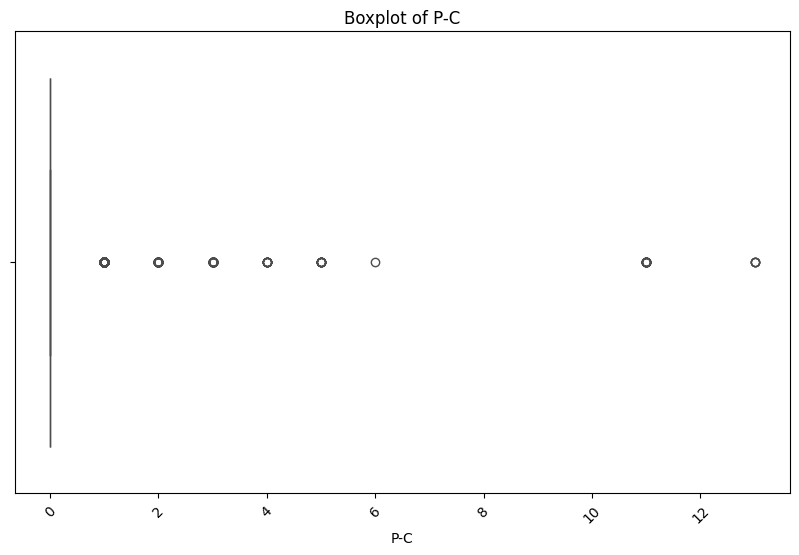

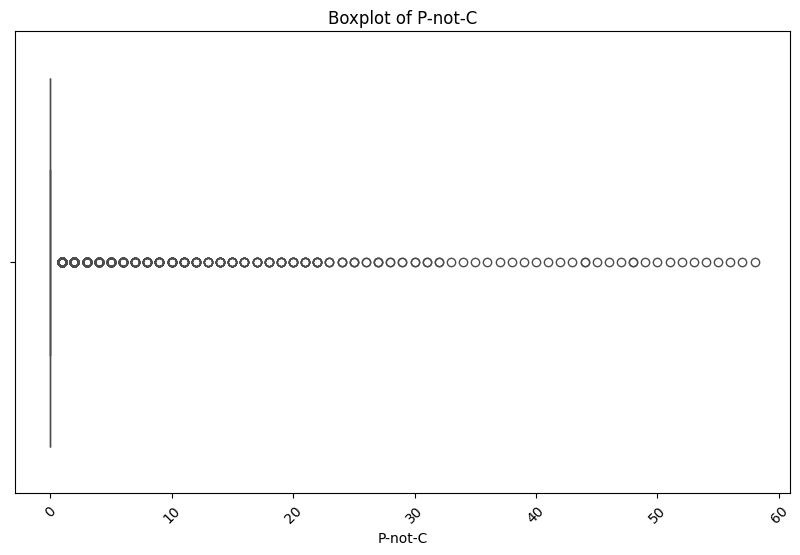

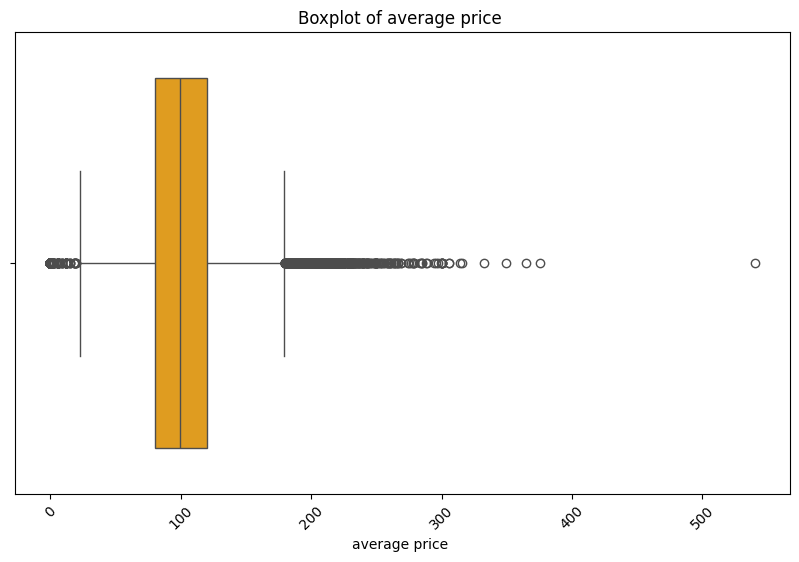

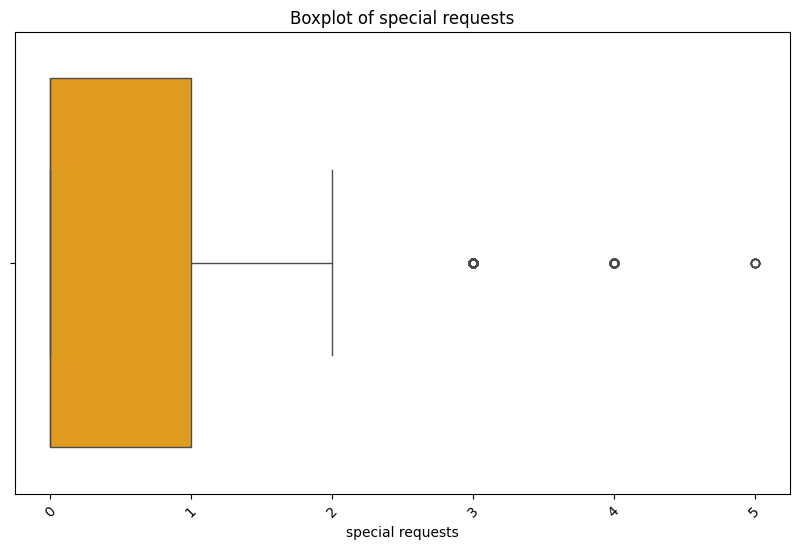

In [941]:
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_encoded[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [942]:
df_removed_outliers = df_encoded.copy()

# For number of week nights
Q1_nights = df_removed_outliers['number of week nights'].quantile(0.25)
Q3_nights = df_removed_outliers['number of week nights'].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights
upper_bound_nights = Q3_nights + 1.5 * IQR_nights
lower_bound_nights = Q1_nights - 1.5 * IQR_nights

# For average price
Q1_price = df_removed_outliers['average price '].quantile(0.25)
Q3_price = df_removed_outliers['average price '].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_bound_price = Q3_price + 1.5 * IQR_price
lower_bound_price = Q1_price - 1.5 * IQR_price

# For P-not-C
Q1_pnc = df_removed_outliers['P-not-C'].quantile(0.25)
Q3_pnc = df_removed_outliers['P-not-C'].quantile(0.75)
IQR_pnc = Q3_pnc - Q1_pnc
upper_bound_pnc = Q3_pnc + 1.5 * IQR_pnc
lower_bound_pnc = Q1_pnc - 1.5 * IQR_pnc

# Remove outliers (this will actually remove rows)
df_removed_outliers = df_removed_outliers[
    (df_removed_outliers['number of week nights'] >= lower_bound_nights) & 
    (df_removed_outliers['number of week nights'] <= upper_bound_nights) &
    (df_removed_outliers['average price '] >= lower_bound_price) & 
    (df_removed_outliers['average price '] <= upper_bound_price) &
    (df_removed_outliers['P-not-C'] >= lower_bound_pnc) & 
    (df_removed_outliers['P-not-C'] <= upper_bound_pnc)
]

# Compare rows
print("Original DataFrame rows:", len(df_encoded))
print("DataFrame with removed outliers:", len(df_removed_outliers))

Original DataFrame rows: 36285
DataFrame with removed outliers: 33601


In [943]:
Q1_lead = df_removed_outliers['lead time'].quantile(0.25)
Q3_lead = df_removed_outliers['lead time'].quantile(0.75)
IQR_lead = Q3_lead - Q1_lead
upper_bound_lead = Q3_lead + 1.5 * IQR_lead
lower_bound_lead = Q1_lead - 1.5 * IQR_lead

df_removed_outliers = df_removed_outliers[
    (df_removed_outliers['lead time'] >= lower_bound_lead) & 
    (df_removed_outliers['lead time'] <= upper_bound_lead)
]

print("Rows before removing lead time outliers:", len(df_encoded))
print("Rows after removing lead time outliers:", len(df_removed_outliers))


Rows before removing lead time outliers: 36285
Rows after removing lead time outliers: 32494


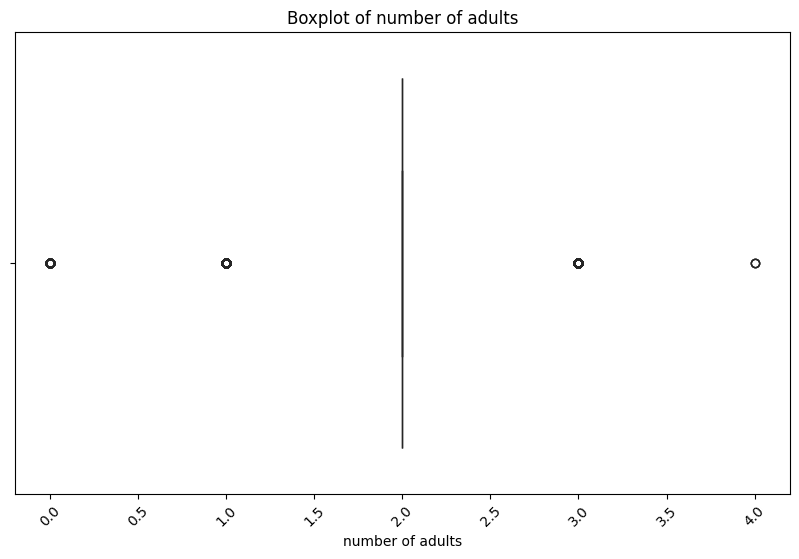

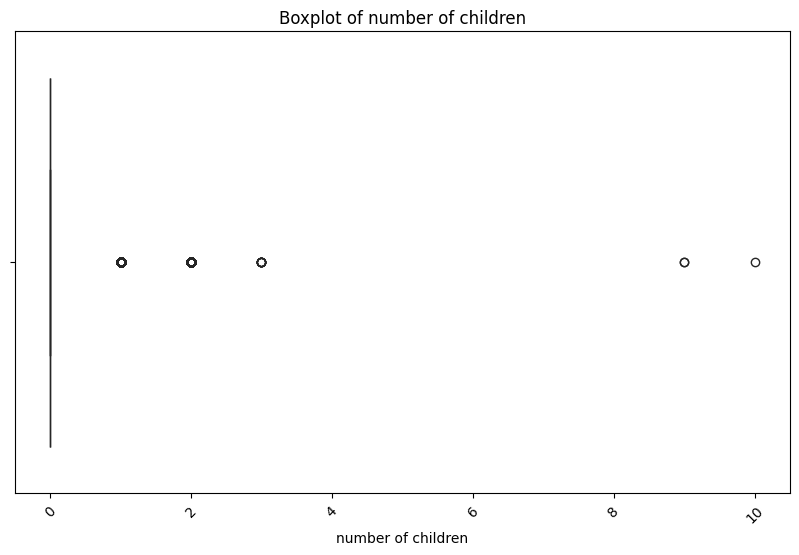

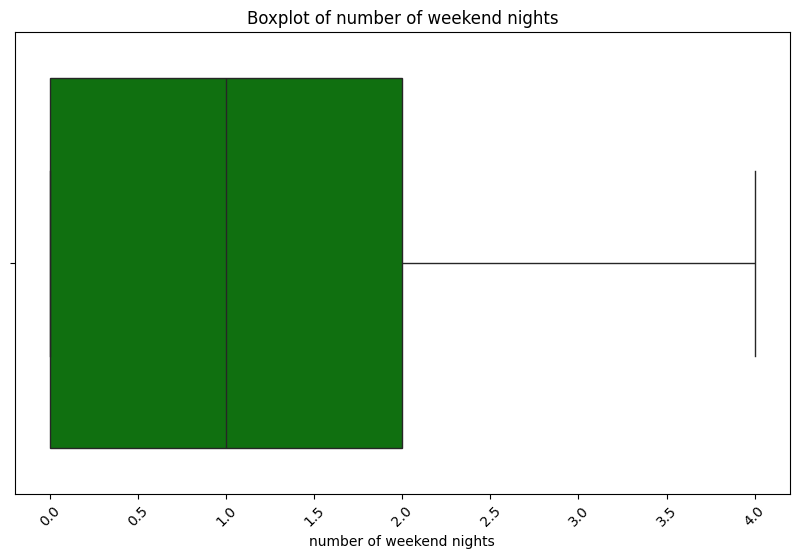

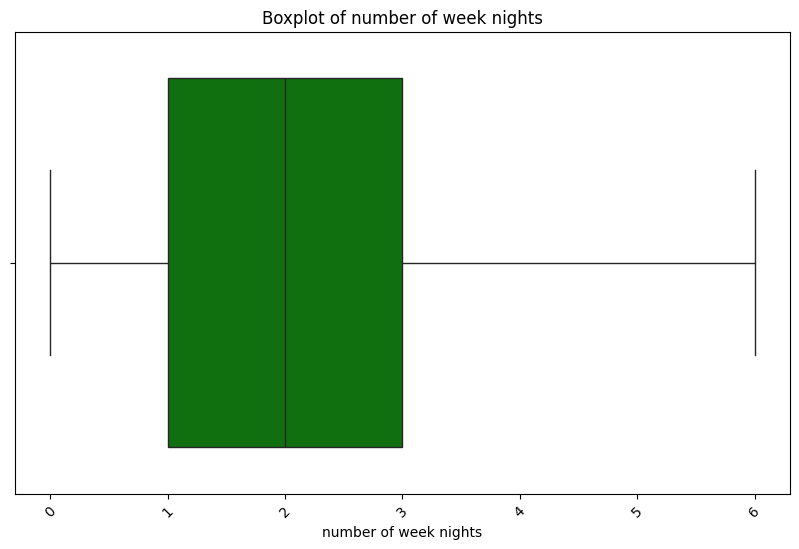

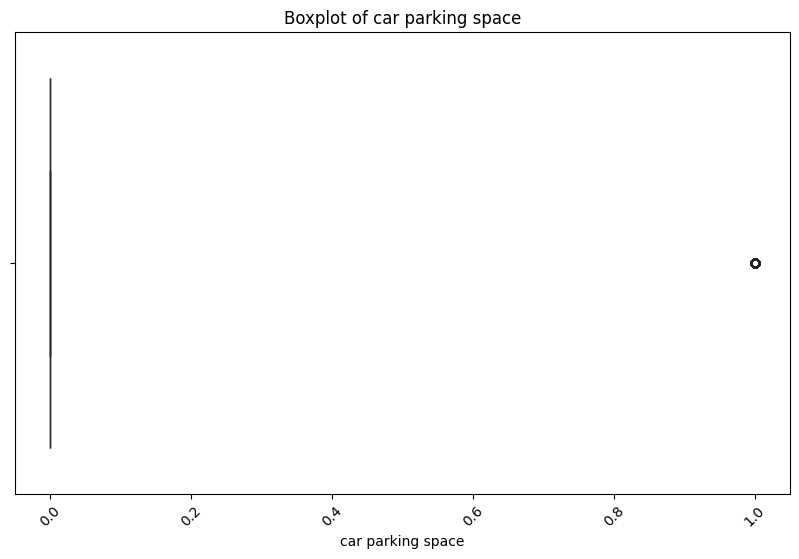

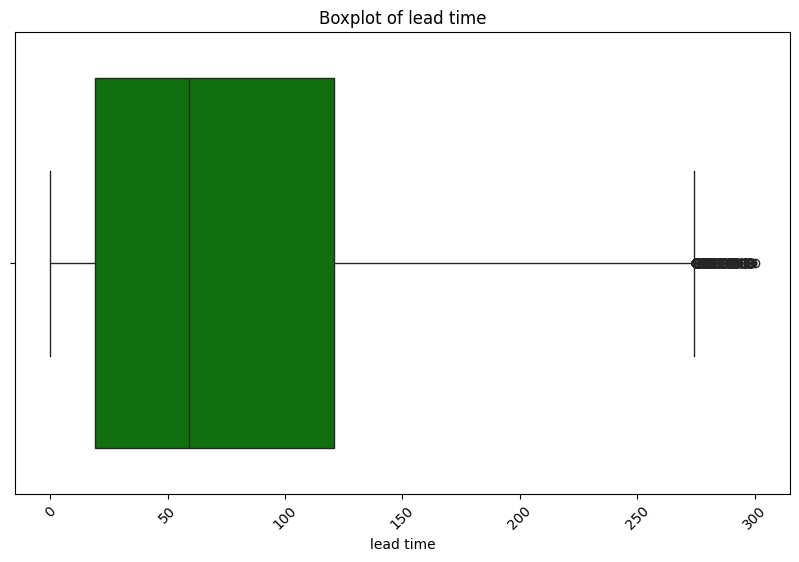

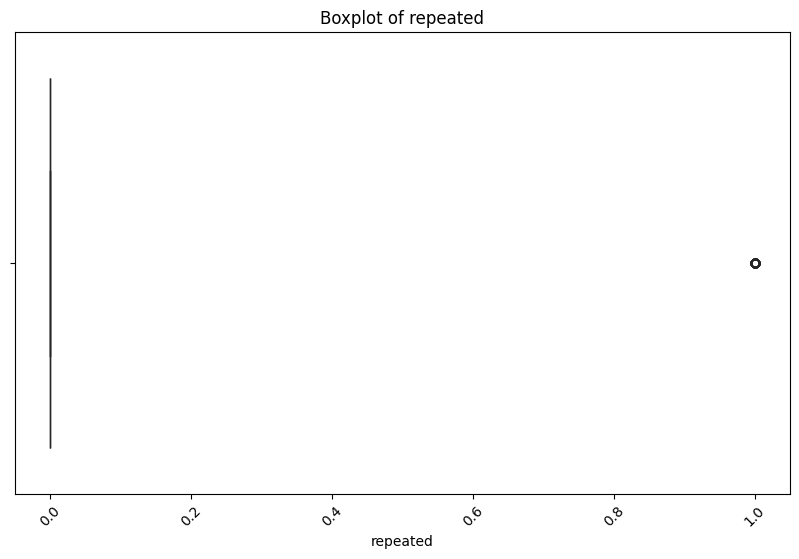

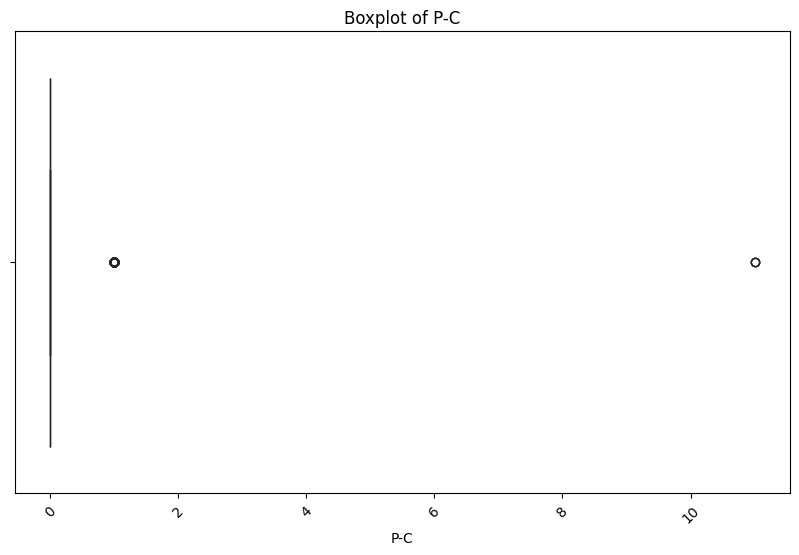

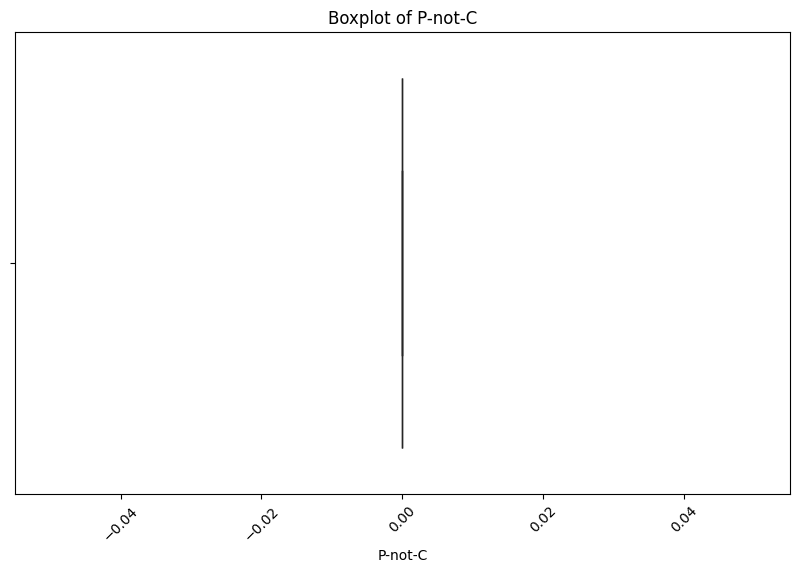

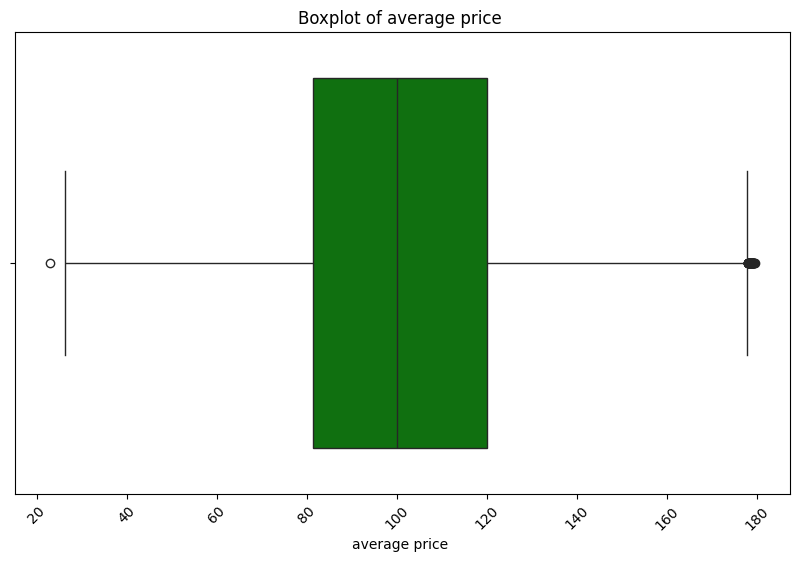

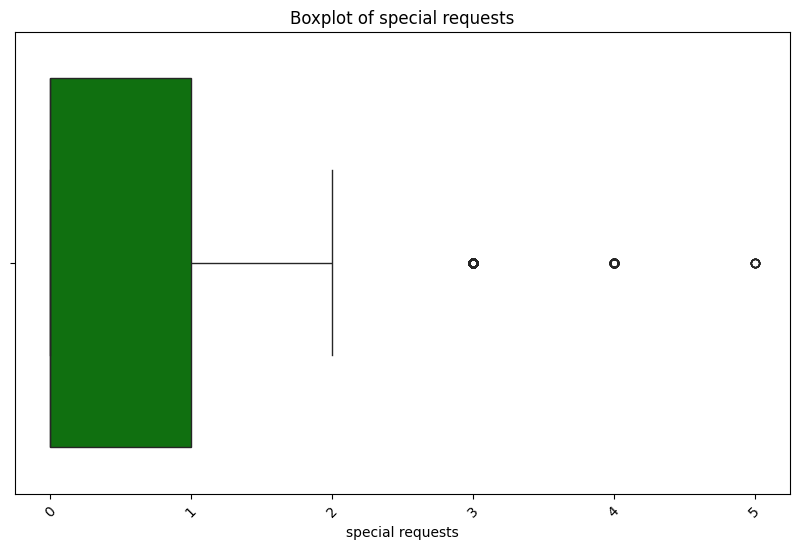

In [944]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_removed_outliers[column], color='green')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [945]:
date_columns = ['reservation_month', 'reservation_day', 'reservation_dayofweek' , 'reservation_year']
df_removed_outliers[date_columns] = df_removed_outliers[date_columns].fillna(df_removed_outliers[date_columns].mode().iloc[0])

# Verify NaN values are gone
print(df_removed_outliers.isnull().sum())

number of adults                      0
number of children                    0
number of weekend nights              0
number of week nights                 0
car parking space                     0
lead time                             0
repeated                              0
P-C                                   0
P-not-C                               0
average price                         0
special requests                      0
date of reservation                  29
booking status                        0
reservation_year                      0
reservation_month                     0
reservation_day                       0
reservation_dayofweek                 0
type of meal_Meal Plan 2              0
type of meal_Meal Plan 3              0
type of meal_Not Selected             0
room type_Room_Type 2                 0
room type_Room_Type 3                 0
room type_Room_Type 4                 0
room type_Room_Type 5                 0
room type_Room_Type 6                 0


In [946]:
numeric_columns = ['number of adults', 'number of children', 
                  'number of weekend nights', 'number of week nights',
                  'car parking space', 'lead time', 'repeated',
                  'P-C', 'P-not-C', 'average price ', 'special requests',
                  'reservation_month', 'reservation_day', 'reservation_dayofweek']


df_with_scaling = df_removed_outliers.copy()  
df_no_scaling = df_removed_outliers.copy()    

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric columns
df_with_scaling[numeric_columns] = scaler.fit_transform(df_with_scaling[numeric_columns])

# Verify the differences
print("Data without scaling (first few rows):")
print(df_no_scaling[numeric_columns].head())
print("\nData with scaling (first few rows):")
print(df_with_scaling[numeric_columns].head())

Data without scaling (first few rows):
   number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  car parking space  lead time  repeated  P-C  \
0                      5                  0        224         0    0   
1                      3                  0          5         0    0   
2                      3                  0          1         0    0   
3                      2                  0        211         0    0   
4                      2                  0         48         0    0   

   P-not-C  average price   special requests  reservation_month  \
0        0           88.00              

In [947]:
x = df_removed_outliers.drop(["booking status",'date of reservation'],axis="columns")
y = df_removed_outliers["booking status"]

In [948]:
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.4)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.3)

print("Size of training set:", X_train.shape[0])
print("Size of validation set:", X_val.shape[0])
print("Size of test set:", X_test.shape[0])

Size of training set: 19496
Size of validation set: 9098
Size of test set: 3900


In [949]:
x_stand = df_with_scaling.drop(["booking status","date of reservation"],axis="columns")
y_stand = df_with_scaling["booking status"]

In [950]:
X_train1, X_remaining1, y_train1, y_remaining1 = train_test_split(x_stand, y_stand, test_size=0.4)

X_val1, X_test1, y_val1, y_test1 = train_test_split(X_remaining1, y_remaining1, test_size=0.3)

print("Size of training set:", X_train1.shape[0])
print("Size of validation set:", X_val1.shape[0])
print("Size of test set:", X_test1.shape[0])

Size of training set: 19496
Size of validation set: 9098
Size of test set: 3900


In [951]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [952]:
train_accuracy_logistic = model_logistic.score(X_train,y_train)
train_accuracy_logistic

0.7970865818629462

In [953]:
test_accuracy_logistic = model_logistic.score(X_test,y_test)
test_accuracy_logistic

0.798974358974359

In [954]:
validation_accuracy_logistic = model_logistic.score(X_val,y_val)
validation_accuracy_logistic

0.7939107496153001

After standardization

In [955]:
model_logistic_stand = LogisticRegression()
model_logistic_stand.fit(X_train1,y_train1)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [956]:
train_accuracy_logistic_stand = model_logistic_stand.score(X_train1,y_train1)
train_accuracy_logistic_stand

0.800112843660238

In [957]:
validation_accuracy_logistic_stand = model_logistic_stand.score(X_val1,y_val1)
validation_accuracy_logistic_stand

0.7880852934710926

In [958]:
model_logistic_2= LogisticRegression(C=0.00001, penalty=None, solver="newton-cg",max_iter=100)

In [959]:
model_logistic_2.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=1e-05, penalty=None, solver='newton-cg')

In [960]:
train_accuracy_logistic_2 = model_logistic_2.score(X_train,y_train)
train_accuracy_logistic_2

0.7978046778826426

In [961]:
test_accuracy_logistic_2 = model_logistic_2.score(X_test,y_test)
test_accuracy_logistic_2

0.7894871794871795

In [962]:
validation_accuracy_logistic_2 = model_logistic_2.score(X_val,y_val)
validation_accuracy_logistic_2

0.7977577489558144

In [963]:
y_pred_logistic = model_logistic_2.predict(X_test)

In [964]:
Logistic_acc = accuracy_score(y_test, y_pred_logistic)
Logistic_per = precision_score(y_test, y_pred_logistic)
Logistic_rec = recall_score(y_test, y_pred_logistic)
Logistic_f1 = f1_score(y_test, y_pred_logistic)

print("Accuracy:", Logistic_acc)
print("Precision:", Logistic_per)
print("Recall:", Logistic_rec)
print("F1 Score:", Logistic_f1)

Accuracy: 0.7894871794871795
Precision: 0.8285912560721721
Recall: 0.8795580110497238
F1 Score: 0.8533142755047347


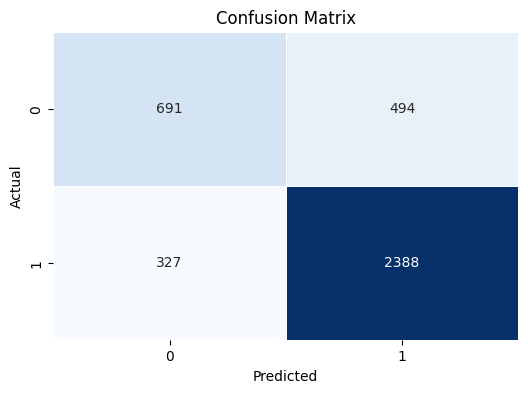

In [965]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN befor stand

In [966]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [967]:
train_accuracy_knn = model_knn.score(X_train,y_train)
train_accuracy_knn

0.8553549446040213

In [968]:
test_accuracy_knn = model_knn.score(X_test,y_test)
test_accuracy_knn

0.7971794871794872

In [969]:
validation_accuracy_knn = model_knn.score(X_val,y_val)
validation_accuracy_knn

0.791272807210376

after stand

In [970]:
model_knn_stand = KNeighborsClassifier()
model_knn_stand.fit(X_train1,y_train1)

KNeighborsClassifier()

In [971]:
train_accuracy_knn_stand = model_knn_stand.score(X_train1,y_train1)
train_accuracy_knn_stand

0.8880796060730406

In [972]:
test_accuracy_knn_stand = model_knn_stand.score(X_test1,y_test1)
test_accuracy_knn_stand

0.8287179487179487

In [973]:
validation_accuracy_knn_stand = model_knn_stand.score(X_val1,y_val1)
validation_accuracy_knn_stand

0.8410639701033195

In [974]:
model_knn_2 = KNeighborsClassifier(
    n_neighbors=3,         
    weights='uniform',     
    metric='manhattan',     
    p=1
)

In [975]:
model_knn_2.fit(X_train1,y_train1)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)

In [976]:
train_knn_accuracy_2 = model_knn_2.score(X_train1,y_train1)
train_knn_accuracy_2

0.9118793598686911

In [977]:
test_knn_accuracy_2 = model_knn_2.score(X_test1,y_test1)
test_knn_accuracy_2

0.8343589743589743

In [978]:
validation_accuracy_knn_2 = model_knn_2.score(X_val1,y_val1)
validation_accuracy_knn_2

0.8315014288854693

In [979]:
y_pred_KNN = model_knn.predict(X_test)

testing for knn before standraization 

In [980]:
KNN_acc = accuracy_score(y_test, y_pred_KNN)
KNN_per = precision_score(y_test, y_pred_KNN)
KNN_rec = recall_score(y_test, y_pred_KNN)
KNN_f1 = f1_score(y_test, y_pred_KNN)

print("Accuracy:", KNN_acc)
print("Precision:", KNN_per)
print("Recall:", KNN_rec)
print("F1 Score:", KNN_f1)

Accuracy: 0.7971794871794872
Precision: 0.8373071528751753
Recall: 0.8795580110497238
F1 Score: 0.8579126998383331


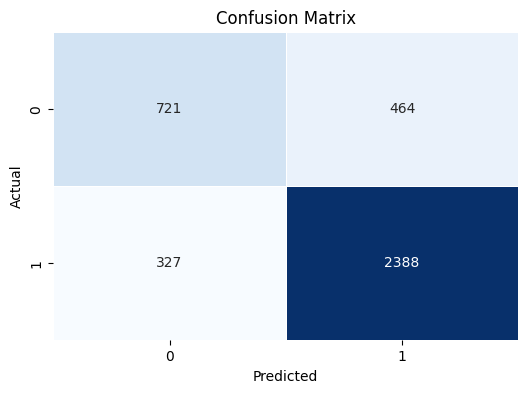

In [981]:
conf_matrix = confusion_matrix(y_test, y_pred_KNN)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

testing after stand

In [983]:
y_pred_KNN1 = model_knn_2.predict(X_test1)

In [984]:
KNN_acc1 = accuracy_score(y_test1, y_pred_KNN1)
KNN_per1 = precision_score(y_test1, y_pred_KNN1)
KNN_rec1 = recall_score(y_test1, y_pred_KNN1)
KNN_f1_1 = f1_score(y_test1, y_pred_KNN1)

print("Accuracy:", KNN_acc1)
print("Precision:", KNN_per1)
print("Recall:", KNN_rec1)
print("F1 Score:", KNN_f1_1)

Accuracy: 0.8343589743589743
Precision: 0.8651231165012863
Recall: 0.8940372199012533
F1 Score: 0.8793425476279417


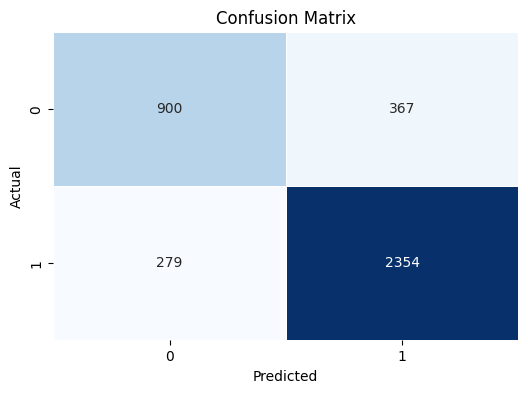

In [985]:
conf_matrix = confusion_matrix(y_test1, y_pred_KNN1)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()